<a href="https://colab.research.google.com/github/govind527/Pytorch_Practice/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## importing libraries

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms

from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torchvision.__version__)

0.21.0+cu124


In [2]:
train_data=datasets.FashionMNIST(
    root="data",# where to download the data
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(), ## how we want to transform data
    target_transform =None ## wnat to transform labels
)

test_data=datasets.FashionMNIST(
    root="data", # where to download the data
    train=False,
    download=True,
    transform=ToTensor(), ## how we want to transform data
    target_transform =None ## wnat to transform labels
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 355kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.28MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.26MB/s]


In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
## first training example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [6]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_id=train_data.class_to_idx
class_to_id

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## visualizing data

torch.Size([1, 28, 28])


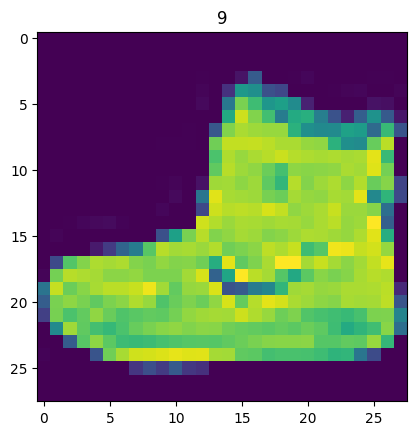

In [13]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(label);

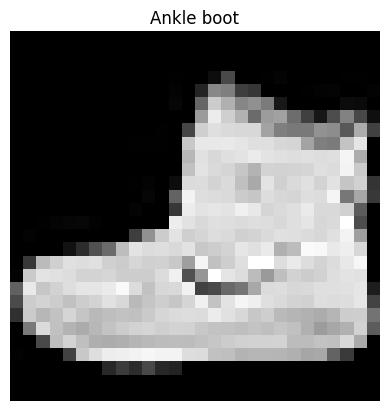

In [18]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False);

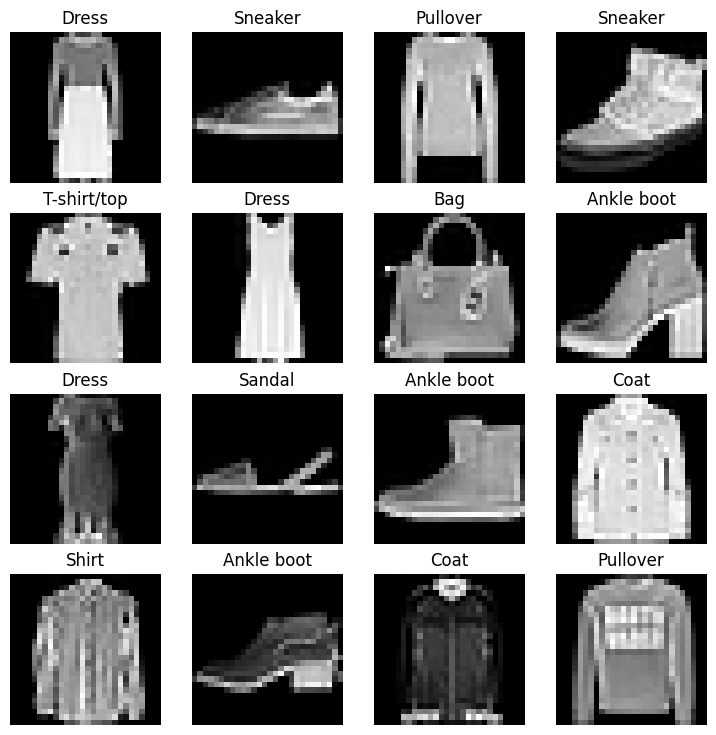

In [26]:
##torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(train_data.classes[label])
  plt.axis(False);